#### Fourier Analysis
##### [Hiroyuki Chihara](https://fiomfd.github.io/) (University of the Ryukyus, Okinawa Island, Japan)

##### Fourier series
1. Definition of Fourier series
2. Real Form of the Fourier series
3. Example of Fourier series
4. Dirichelet kernel
5. Fourier series of periodic continuous functions
6. Fourier series of triangular function
7. A continuous function whose fourier series does not converges even pointwisely
8. Step function and sawtooth function
9. Decomposition of piecewise smooth functions
10. Weyl's equidistribution theorem
11. Continuous but nowhere differentiable functions

##### Fourier Series and Fourier transform
12. Shannon's sampling theorem and aliasing

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
import numpy as np
import math

## Fourier series

#### 1. Definition of Fourier series
Throughout this note we consider piecewise continuous $1$-periodic functions $f(x)$ on $\mathbb{R}$, that is,

-  $f(x+1)=f(x)$ for all $x\in\mathbb{R}$.

- There exist numbers $0=a_0<a_1<\dotsb<a_m=1$ such that $f(x)$ is continuous on each open interval $(a_{j-1},a_j$, $j=1,\dotsc,m$, and limits exist:
$f(a_0+0), \quad f(a_1-0), \quad f(a_1+0), \quad \dotsc \quad f(a_m-0).$

We remark that if we restrict $f(x)$ on each closed interval $[a_{j-1}+k,a_{j}+k]$ for $j=1,\dotsc,m$ and $k\in\mathbb{Z}$, $f(x)$ can be regarded as a continuous function. We denote by $\mathcal{L}$ the set of all piecewise continuous $1$-periodic functions on $\mathbb{R}$.

All the $e^{2\pi i nx}$, $n\in\mathbb{Z}$ are $1$-periodic smooth functions. In the spirit of Joseph Fourier (1768-1830), we consider whether $f(x)\in\mathcal{L}$ can be expressed by a trigonometric series of the form

$$\sum_{n=-\infty}^{\infty}c_ne^{2\pi i nx}.$$

If $f(x)=\displaystyle\sum_{n=-\infty}^{\infty}c_ne^{2\pi i nx}$ holds, then we have by formal computation

$$
\begin{aligned}
  \int_0^1
  f(x)
  e^{-2\pi i mx}
  dx
& =
  \int_0^1
  \sum_{n=-\infty}^{\infty}
  c_n
  e^{2\pi i (n-m)x}
  dx
\\
& =
  \sum_{n=-\infty}^{\infty}
  c_n
  \int_0^1
  e^{2\pi i (n-m)x}
  dx
\\
& =
  \sum_{n=-\infty}^{\infty}
  c_n
  \delta_{mn}
  =
  c_m.
\end{aligned}
$$

Note that the condition $f(x)\in\mathcal{L}$ guarantees the existence of the left hand side of the above. The formal trigonometric series defined by

$$
\sum_{n=-\infty}^{\infty}c_ne^{2\pi i nx},
\quad
c_n=\int_0^1f(x)e^{-2\pi i nx}dx
$$

is said to be the Fourier series of $f(x)$, and we denote this by

$$f(x)\sim\sum_{n=-\infty}^{\infty}c_ne^{2\pi i nx}.$$

 $c_n$ is called the $n$-th Fourier coefficient of $f(x)$.

#### 2. Real Form of the Fourier series
If $f(x)$ is real valued, then the Fourier series can be written by the real-valued trigonometric series. In this case $\overline{c_n}=c_{-n}$ holds, and $c_0$ is a real number. If we set for $n=0,1,2,\dotsc$

$$\overline{c_n}=c_{-n}=\frac{a_n+ib_n}{2},$$

$$a_n
=
2
\int_0^1
f(x)
\cos(2\pi nx)
dx,$$

$$b_n
=
2
\int_0^1
f(x)
\sin(2\pi nx)
dx.$$

then $b_0=0$, and

$$f(x)
\sim
\frac{a_0}{2}
+
\sum_{n=1}^\infty
\bigl(
a_n\cos(2\pi nx)
+
b_n\sin(2\pi n x)
\bigr).$$

It is convenient to compute

$$\frac{a_0}{2}
=
c_0
=
\int_0^1
f(x)
dx,$$

$$a_n+ib_n
=
2c_{-n}
=
2
\int_0^1
f(x)
e^{2\pi i nx}
dx,
\quad
n=1,2,3,\dotsc.$$

For $\lambda=\mu+\nu\in\mathbb{C}$, $\mu,\nu\in\mathbb{R}$, we have

$$
\begin{aligned}
  e^{\lambda x}
& =
  e^{\mu x + i\nu x}
  =
  e^{\mu x}
  \{\cos(\nu x) + i\sin(\nu x)\},
\\
  \frac{d}{dx}
  e^{\lambda x}
& =
  \mu
  e^{\mu x}
  \{\cos(\nu x) + i\sin(\nu x)\}
  +
  \nu
  e^{\mu x}
  \{-\sin(\nu x) + i\cos(\nu x)\}
\\
& =
  \mu
  e^{\mu x}
  \{\cos(\nu x) + i\sin(\nu x)\}
  +
  i\nu
  e^{\mu x}
  \{i\sin(\nu x) + \cos(\nu x)\}
\\
& =
  (\mu+i\nu)
  e^{\mu x}
  \{\cos(\nu x) + i\sin(\nu x)\}
  =
  \lambda
  e^{\lambda x},
\end{aligned}
$$

which is useful for computing Fourier coefficients.


#### 3. Example of Fourier series
Let $f(x)$ be a function defined by

$$f(x):=\min\{x-[x],1-x-[1-x]\}, \quad x\in\mathbb{R},$$

$$\lfloor{s}\rfloor:=\max\{m\in\mathbb{Z} : m \leqq s\}, \quad x\in\mathbb{R}.$$

In other words, $f(x)$ is a $1$-periodic Lipshitz continuous function such that

$$f(x)
=
\begin{cases}
x, &\ x\in[0,1/2),
\\
1-x, &\ x\in[1/2,1).
\end{cases}$$

We shall confirm that the Fourier series of $f(x)$ is

$$f(x)
\sim
\frac{1}{4}
-
\sum_{k=1}^\infty
\frac{2}{(2k-1)^2\pi^2}
\cos\bigl(2(2k-1)\pi x\bigr).$$

Indeed

$$
\frac{a_0}{2}
=
\int_0^{1/2}xdx+\int_{1/2}^1(1-x)dx
=
\frac{2}{2^3}
=
\frac{1}{4},$$

and for $n=1,2,3,\dotsc$,

$$
\begin{aligned}
  a_n+ib_n
& =
  2
  \int_0^{1/2}xe^{2\pi i nx}dx
  +
  2
  \int_{1/2}^1(1-x)e^{2\pi i nx}dx
\\
& =
  \left[
  \frac{xe^{2\pi i nx}}{n\pi i}
  \right]_0^{1/2}
  +
  \left[
  \frac{(1-x)e^{2\pi i nx}}{n\pi i}
  \right]_{1/2}^1
  -
  \int_0^{1/2}
  \frac{e^{2\pi i nx}}{n\pi i}
  dx
  +
  \int_{1/2}^1
  \frac{e^{2\pi i nx}}{n\pi i}
  dx
\\
& =
  0
  -
  \left[
  \frac{e^{2\pi i nx}}{2(n\pi i)^2}
  \right]_0^{1/2}
  +
  \left[
  \frac{e^{2\pi i nx}}{2(n\pi i)^2}
  \right]_{1/2}^1
\\
& =
  \frac{e^{\pi i n}-1-1+e^{\pi i n}}{2n^2\pi^2}
  =
  \frac{\cos(\pi n)-1}{n^2\pi^2}
  =
  -
  \frac{1-(-1)^n}{n^2\pi^2}
\\
& =
  \begin{cases}
  -
  \dfrac{2}{(2k-1)^2\pi^2},
  &\ n=2k-1,
  \\
  0
  &\ n=2k,
  \end{cases}
  \quad
  k=1,2,3,\dotsc.
\end{aligned}
$$

#### 4. Dirichelet kernel
Suppose $f(x)\in\mathcal{L}$ and $f(x)\sim\displaystyle\sum_{n=-\infty}^\infty c_ne^{2\pi i nx}$. Our basic problems are the following.

- Q1. Does the formal series $\displaystyle\sum_{n=-\infty}^\infty c_ne^{2\pi i nx}$ converge?

- Q2. If the formal series $\displaystyle\sum_{n=-\infty}^\infty c_ne^{2\pi i nx}$ converges, $f(x)=\displaystyle\sum_{n=-\infty}^\infty c_ne^{2\pi i nx}$ holds?

We introduce the partial $N$-the sum of the series

$$S_N(s):=\sum_{n=-N}^{n=N}c_ne^{2\pi i nx}.$$

We have

$$S_N(x)
=
\int_0^1D_N(x-y)f(y)dy
=
\int_{-1/2}^{1/2}D_N(t)f(x+t)dt,$$

$$D_N(t)
=
\sum_{n=-N}^{n=N}
e^{2\pi i nt}
=
1+
2\sum_{n=1}^N
\cos(2\pi n x)$$

by the definition of the Fourier coefficients. $D_N(t)$ is called the $N$-th Dirichelet kernel. $D_N(t)$ is $1$-periodic smooth function and

$$\int_0^1D_N(t)dt=1.$$

Moreover we obtain

$$D_N(t)
=
\begin{cases}
\dfrac{\sin\bigl(\pi(2N+1)t\bigr)}{\sin(\pi t)},
&\ t\not\in\mathbb{Z},
\\
2N+1,
&\ t\in\mathbb{Z}.
\end{cases}$$

This expression is useful to study the convergence and divergence of Fourier series. Here we observe the behavior of the Dirichelet kernel in a one-period interval $[-1/2,1/2]$. Roughly speaking

- The mass is concentrating on an interval $I_N:=[-1/(2N+1),1/(2N+1)]$ as $N\rightarrow\infty$.

-  $D_N(t)$ oscillates more violently in $[-1/2,1/2]\setminus{I_N}=[-1/2,-1/(2N+1))\cup(1/(2N+1),1/2]$ as $N\rightarrow\infty$.


In [2]:
M=100;
def dirichlet(N=0):
    t = np.linspace(-0.6, 0.6, num = 301)
    S=np.ones((M+1,301))
    for m in range(1,M+1):
        for k in range(0,300):
            S[m,k]=S[m-1,k]+2*np.cos(2*np.pi*(m-1)*t[k])
    plt.title("Dirichelet Kernel D_N(t)")
    plt.plot(t, S[N,:])
    plt.ylim([-M/2,2*M+M/10])
    plt.xlabel("t")
    plt.xticks([-0.5,0,0.5])
    plt.yticks([0,200])
    plt.grid(False)
    plt.show()
interact(dirichlet, N=(0, M, 1));

interactive(children=(IntSlider(value=0, description='N'), Output()), _dom_classes=('widget-interact',))

### 5. Fourier series of periodic continuous functions
We have the following results on the convergence and divergence of the Fourier series of continuous function.

1. Suppose that $f(x)$ is $1$-periodic Hoelder continuous of degree $\alpha\in(0,1]$, that is, there exists a constant $L>0$ such that $\lvert{f(x)-f(y)}\rvert \leqq L\lvert{x-y}\rvert^\alpha$ for any $x,y\in\mathbb{R}$. Then
$\max_{x\in[0,1]}\lvert{S_N(x)-f(x)}\rvert \rightarrow 0 \quad (N\rightarrow\infty).$

2. Moreover if $\alpha>1/2$, then
$\displaystyle\sum_{n=-\infty}^\infty\lvert{c_n}\rvert<\infty.$

3. There exists a is -periodic continuous function $f(x)$ such that
$S_N(0) \rightarrow \infty \quad (N\rightarrow\infty).$

Here we have some remarks on Hoelder continuity. The condition $\lvert{f(x)-f(y)}\rvert \leqq L\lvert{x-y}\rvert^\alpha$ is a restriction only for small $\lvert{x-y}\rvert$ since the absolute value of a periodic continuous function has a maximum. Roughly speaking, the exponent $\alpha$ expresses that $f(x)$ is differentiable of order $\alpha$. When $\alpha=1$, the Hoelder continuity is said to be the Lipshitz continuity. The Rademach theorem shows that the Lipshitz continuous function is differentiable almost everywhere with respect to the Lebesgue measure on $\mathbb{R}$. Roughly speaking, Part 1 and Part 3 assert that if $f(x)$ is a little bit smoother than continuous functions, its Fourier series uniformly converges to , and otherwise, its Fourier series does not necessarily converge even pointwisely.

We show the outline of the proof of Part 1. Note that $S_N(x)-f(x)$ can be written as


$$
S_N(x)-f(x)
=
\int_{-1/2}^{1/2}
D_N(t)\{f(x+t)-f(x)\}
dt.
$$

The Hoelder condition implies that for any small $\delta>0$

$S_N(x)-f(x)
=
\int_{\lvert{t}\rvert<\delta}
\mathcal{O}(\lvert{t}\rvert^{-1+\alpha})
dt
+
\int_{\delta<\lvert{t}\rvert<1/2}
\sin\bigl(\pi(2N+1)t\bigr)
\times\dotsb
dt.$

The second term of the right hand side is vanishing as $N\rightarrow\infty$ due to the oscillation and $\displaystyle\int_0^1\sin(2\pi t)dt=0$. Indeed for any $\varphi(t) \in C^1[0,1]$,

$$\int_0^1\sin(2\pi Nt)\varphi(t)dt=\left[-\frac{\cos(2\pi Nt)\varphi(t)}{2\pi N}\right]_0^1
+\int_0^1\frac{\cos(2\pi Nt)\varphi^\prime(t)}{2\pi N}dt=\mathcal{O}(N^{-1})
\quad (N\rightarrow\infty).$$

The differentiability of  is not required for this. In fact one can also prove

$$\int_0^1\sin(2\pi Nt)\varphi(t)dt \rightarrow 0 \quad (N\rightarrow\infty)$$

for $\varphi(t) \in C[0,1]$ by using the uniform continuity of $\varphi(t)$ and  $\displaystyle\int_0^1\sin(2\pi t)dt=0$. So we have for any small $\delta>0$

$$S_N(x)-f(x)
=\mathcal{O}(\delta^\alpha)+o(1)
\quad
(N\rightarrow\infty).$$


#### 6. Fourier series of triangular function
Consider a $1$-periodic function  defined by

$$f(x)
:=
\begin{cases}
x, &\ x\in[0,1/2),
\\
1-x, &\ x\in[1/2,1).
\end{cases}$$

This is the same as the example in Section 3. Here we observe the uniform convergence of the Fourier series of $f(x)$, which is

$$\begin{aligned}
  f(x)
& =
  \frac{1}{4}
  -
  \sum_{k=1}^\infty
  \frac{2}{(2k-1)^2\pi^2}
  \cos\bigl(2(2k-1)\pi x\bigr),
\\
  S_{2K-1}[f](x)
& =
  \frac{1}{4}
  -
  \sum_{k=1}^K
  \frac{2}{(2k-1)^2\pi^2}
  \cos\bigl(2(2k-1)\pi x\bigr).
\end{aligned}$$

In [3]:
M=20;
def triangle(K=0):
    x = np.linspace(-0.1, 1.1, num=481)
    y = x - np.floor(x)
    f = np.minimum(y, 1 - y)

    S=np.ones((M+1,481))/4
    for k in range(1,M):
        for l in range(0,480):
            S[k,l]=S[k-1,l]-2*np.cos(2*(2*k-1)*np.pi*x[l])/(2*k-1)**2/np.pi**2
        S[k,480]=S[k,0]

    plt.title("Triangular Function and its Fourier Series")
    plt.plot(x, f)
    plt.plot(x, S[K,:])
    plt.xlabel("x")
    plt.xticks([0,0.5,1])
    plt.yticks([0,0.5])
    plt.grid(False)
    plt.show()
interact(triangle, K=(0, M, 1));

interactive(children=(IntSlider(value=0, description='K', max=20), Output()), _dom_classes=('widget-interact',…

#### 7. A continuous function whose fourier series does not converges even pointwisely

Define a function

$$f(x)=
\sum_{k=1}^\infty
\frac{2}{3^k}
\sin\{2\pi(2k+1)n(k)x\}
\sum_{l=1}^{n(k)}
\frac{\sin(2\pi lx)}{l},$$

$$n(k)=3^{3^k},
\quad\text{i.e.,}\quad
\log{n(k)}=3^k\log{3},$$

which converges uniformly on $\mathbb{R}$, and is a $1$-periodic continuous function.
Consider its Fourier series and the patrial sum

$$f(x) \sim \sum_{n=-\infty}^\infty C_ne^{2\pi nx},
\quad
S_N(x):=\sum_{n=-N}^N C_ne^{2\pi nx}.$$

It is well-known that the sequence $\{S_N(0)\}$ does not converge, more precisely, we have

$$S_{(2k+1)n(k)}(0)-S_{2kn(k)}(0)
=
\frac{1}{3^k}\sum_{j=1}^{n(k)-1}\frac{1}{j}
>
\log{3}.$$

We tried to see the graph of $f$ by using

$$f_K(x)
:=
\sum_{k=1}^K
\frac{2}{3^k}
\sin\{2\pi(2k+1)n(k)x\}
\sum_{l=1}^{n(k)}
\frac{\sin(2\pi lx)}{l}.$$

Unfortunately, we could not do it well since

$$n(1)=9, \quad n(2)=19683, \quad n(3)=7625597484987.$$

We could compute $f_2$, and not $f_3$, and show the graph of $f_2$ below.

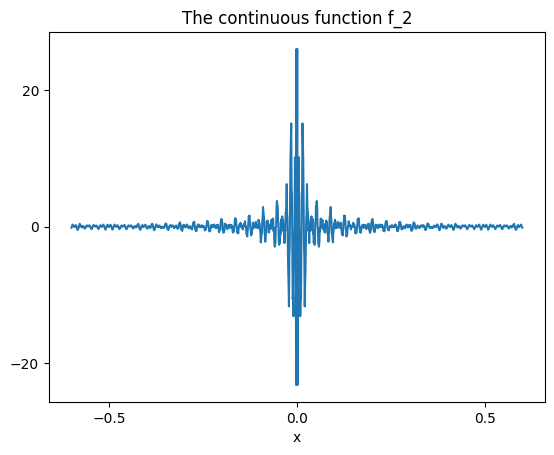

In [ ]:
x = np.linspace(-0.6, 0.6, num=1201)
f = np.zeros(len(x))

for p in range(len(x)):
    for k in range(1, 2+1):           # k = 1,2
        L = 3**(3**k)
        s = 0.0
        for l in range(1, L+1):       # l = 1..L（上端を含む）
            s += math.sin(2*np.pi*l*x[p])
        f[p] += (2/(3**k)) * np.sin(2*np.pi*(2*k+1)*L*x[p]) * s

plt.title("The continuous function f_2")
plt.plot(x, f)
plt.xlabel("x")
plt.xticks([-0.5,0,0.5])
plt.yticks([-20,0,20])
plt.grid(False)
plt.show()

#### 8. Step function and sawtooth function
Let $Y(x)$ be the heaviside function, that is,

$$Y(x)
=
\begin{cases}
1, &\ x\geqq0,
\\
0, &\ x<0.
\end{cases}$$

The value $Y(0)=1$ does not matter essentially, and is not needed to be defined. Consider a step function $g(x)$ and a sawtooth function $h(x)$ defined by

$$g(x)
:=
\sum_{n=-\infty}^\infty
Y(x+n) \times Y(1/2-x-n),
\quad
h(x):=x-[x].$$

They are $1$-periodic function such that for $x\in[0,1)$

$$g(x)
=
\begin{cases}
1, &\ x\in[0,1/2],
\\
0, &\ x\in(1/2,1),
\end{cases}
\quad
h(x)=x.$$

Their Fourier series are

$$\begin{aligned}
  g(x)
& \sim
  \frac{1}{2}
  +
  \sum_{k=1}^\infty
  \frac{2}{(2k-1)\pi}
  \sin\bigl(2(2k-1)\pi x\bigr),
\\
  S_{2K-1}[g](x)
& =
  \frac{1}{2}
  +
  \sum_{k=1}^K
  \frac{2}{(2k-1)\pi}
  \sin\bigl(2(2k-1)\pi x\bigr),
\\
  h(x)
& \sim
  \frac{1}{2}
  -
  \sum_{n=1}^\infty
  \frac{1}{n\pi}
  \sin(2\pi nx),
\\
  S_N[h](x)
& =
  \frac{1}{2}
  -
  \sum_{n=1}^N
  \frac{1}{n\pi}
  \sin(2\pi nx).
\end{aligned}$$

On one hand, at the discontinuous points

$$\begin{aligned}
  S_{2K-1}[g](k)
  =
  \frac{1}{2}
& \rightarrow
  \frac{1}{2}
  =
  \frac{g(k-0)+g(k+0)}{2}
  \quad
  (K\rightarrow\infty),
\\
  S_{2K-1}[g](k+1/2)
  =
  \frac{1}{2}
& \rightarrow
  \frac{1}{2}
  =
  \frac{g(k+1/2-0)+g(k+1/2+0)}{2}
  \quad
  (K\rightarrow\infty),
\\
  S_N[h](k)
  =
  \frac{1}{2}
& \rightarrow
  \frac{1}{2}
  =
  \frac{h(k-0)+h(k+0)}{2}
  \quad
  (N\rightarrow\infty)
\end{aligned}$$

for all $k\in\mathbb{Z}$. On the other hand, we can prove that for any small $\delta>0$

$$\begin{aligned}
  \max_{x\in[\delta,1/2-\delta]\cup[1/2+\delta,1-\delta]}
  \lvert{S_{2K-1}[g](x)-g(x)}\rvert
& \rightarrow
  0
  \quad
  (K\rightarrow\infty),
\\
  \max_{x\in[\delta,1-\delta]}
  \lvert{S_N[h](x)-h(x)}\rvert
& \rightarrow
  0
  \quad
  (N\rightarrow\infty).
\end{aligned}$$

The partial sums oscillate violately as $N$ increases near the discontinuous points. This is called the Gibbs Phenomenon.

In [4]:
M=101
x=np.linspace(-0.1, 1.1, num=481)

g=np.zeros(481)
for i in range(41,241):
    g[i]=1
for i in range(441,481):
    g[i]=1

S=np.ones((M+1,481))/2
for k in range(1,M):
    for l in range(0,480):
        S[k,l]=S[k-1,l]+2*np.sin(2*(2*k-1)*np.pi*x[l])/(2*k-1)/np.pi
    S[k,480]=S[k,80]

def step(K=0):
    plt.title("Step function and its Fourier series")
    plt.plot(x, S[K,:], label='S_{2K-1}[g]')
    plt.plot(x, g, label='g')
    plt.xlabel("x")
    plt.xticks([0,0.5,1])
    plt.yticks([0,0.5,1])
    plt.grid(False)
    plt.legend()
    plt.show()
interact(step, K=(0, M-1, 1));

interactive(children=(IntSlider(value=0, description='K'), Output()), _dom_classes=('widget-interact',))

In [6]:
M=101
x=np.linspace(-0.1, 1.1, num=481)
h=x-np.floor(x)

S=np.ones((M+1,481))/2
for k in range(1,M):
    for l in range(0,480):
        S[k,l]=S[k-1,l]-np.sin(2*k*np.pi*x[l])/k/np.pi
    S[k,480]=S[k,80]

def sawtooth(N=0):
    plt.title("Sawtooth function and its Fourier series")
    plt.plot(x, S[N,:], label='S_N[h]')
    plt.plot(x, h, label='h')
    plt.xlabel("x")
    plt.xticks([0,0.5,1])
    plt.yticks([0,0.5,1])
    plt.grid(False)
    plt.legend()
    plt.show()
interact(sawtooth, N=(0, M-1, 1));

interactive(children=(IntSlider(value=0, description='N'), Output()), _dom_classes=('widget-interact',))

#### 9. Decomposition of piecewise smooth functions
Finally we consider piecewise smooth $1$-periodic functions $f(x)$ on $\mathbb{R}$, that is,

-  $f(x+1)=f(x)$ for all $x\in\mathbb{R}$.

- There exist numbers $0=a_0<a_1<\dotsb<a_m=1$ such that $f(x)$ is continuously differentiable on each open interval $(a_{j-1},a_j$, $j=1,\dotsc,m$, and limits exist:
$f(a_0+0), \quad f(a_1-0), \quad f(a_1+0), \quad \dotsc \quad f(a_m-0),$
$f^\prime(a_0+0), \quad f^\prime(a_1-0), \quad f^\prime(a_1+0), \quad \dotsc \quad f^\prime(a_m-0).$

We remark that if we restrict  on each closed interval $[a_{j-1}+k,a_j+k]$ for $j=1,\dotsc,m$ and $k\in\mathbb{Z}$, $f(x)$ can be regarded as a continuously differentiable function. We can split $f(x)$ into a Lipshitz continuous function, some step functions, and a sawtooth function. We shall illustrate this for a simplest example.

Let $f(x)$ be a piecewise smooth $1$-periodic functions on $\mathbb{R}$ with discontinuities at most $0,c,1$ in the interval $[0,1]$ with some $c\in(0,1)$. Note that $f(0\pm0)=f(1\pm0)$. We denote by $\chi_{[c,1]}(x)$ the characteristic function of the interval $[c,1]$. We define $f_0(x)$, $f_1(x)$, and $f_2(x)$ by

$$\begin{aligned}
  f_0(x)
& :=
  f(x)-f_1(x)-f_2(x),
\\
  f_1(x)
& :=
  \bigl(f(c+0)-f(c-0)\bigr)\chi_{[c,1]}(x),
\\
  f_2(x)
& :=
  -
  \bigl\{
  \bigl(f(0+0)-f(0-0)\bigr)
  +
  \bigl(f(c+0)-f(c-0)\bigr)
  \bigr\}
  h(x).
\end{aligned}$$

Then $f_0(x)$ is Lipshitz continuous. So the piecewise smooth function $f(x)$ is splitted into the Lipshitz function part $f_0(x)$, the step function part $f_1(x)$, and the sawtooth function part $f_2(x)$. From the view point of Fourier series, $f_0(x)$ is harmless, and $f_1(x)+f_2(x)$ contains discontinuities where the Gibbs phenomenon occurs.

We illustrate this decomposition visually.

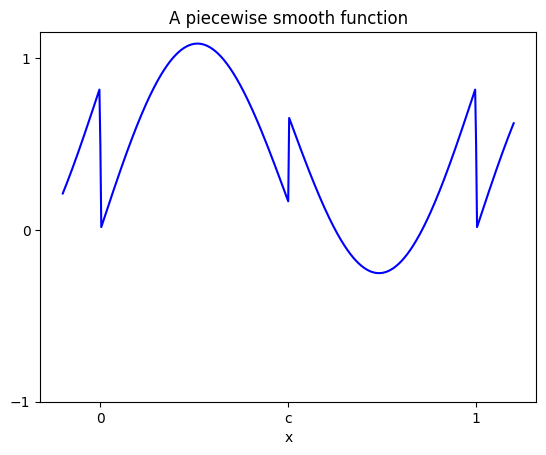

In [7]:
x = np.linspace(-0.1, 1.1, num=481)
f0=np.sin(2*np.pi*x)
f1=(np.ones(481)-g)/2
f2=h/3
F=f0+f1+f2

plt.title("A piecewise smooth function")
plt.plot(x, F, color='blue', label='f')
plt.xlabel("x")
plt.xticks([0,0.5,1],[0,'c',1])
plt.yticks([-1,0,1])
plt.grid(False)
plt.show()

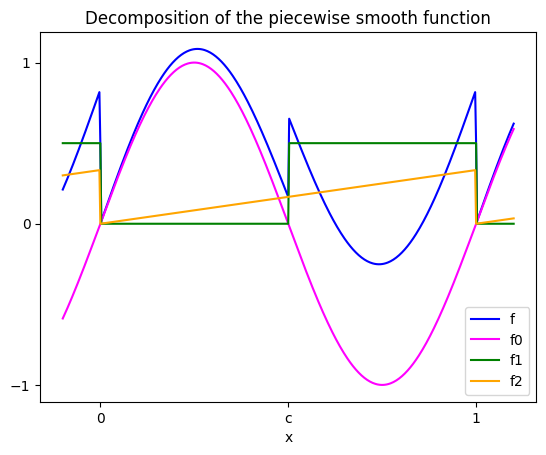

In [8]:
plt.title("Decomposition of the piecewise smooth function")
plt.plot(x, F, color='blue', label='f')
plt.plot(x, f0, color='magenta', label='f0')
plt.plot(x, f1, color='green', label='f1')
plt.plot(x, f2, color='orange', label='f2')
plt.xlabel("x")
plt.xticks([0,0.5,1],[0,'c',1])
plt.yticks([-1,0,1])
plt.grid(False)
plt.legend()
plt.show()

#### 10. Weyl's equidistribution theorem

Let $\lfloor{x}\rfloor$ be the floor function for $x\in\mathbb{R}$, that is, $\lfloor{x}\rfloor:=\max\{m \in \mathbb{Z} : m \leqq x\}$, and set

$$\langle{x}\rangle:=x-\lfloor{x}\rfloor.$$

Then $0\leqq\langle{x}\rangle<1$ and $x\equiv\langle{x}\rangle$ mod $1$.

We say that a sequence $\{a_n\}_{n=1}^\infty \subset [0,1)$ is equidistributed in $[0,1)$ if

$$\frac{\sharp\{n=1,\dotsc,N : a<a_n<b\}}{N} \rightarrow b-a \quad (N \rightarrow \infty)$$

**Weyl's equidistribution theorem**: For any $\gamma\in\mathbb{R}\setminus\mathbb{Q}$, $\{\langle{n\gamma}\rangle\}_{n=1}^\infty$ is equidistributed in $[0,1)$.

We observe Weyl's equidistribution theorem using a bijection

$$[0,1)\ni\langle{x}\rangle \mapsto e^{2\pi{i}\langle{x}\rangle}=e^{2\pi{i}x} \in \mathbb{S}^1:=\{z\in\mathbb{C} : \lvert{z}\rvert=1\}.$$

In [9]:
MM=300
tt=np.linspace(0, 1, num=101)
c1=np.cos(2*np.pi*tt)
c2=np.sin(2*np.pi*tt)

def weyl(N=1,gg=2):
    gamma=np.sqrt(gg)
    weylx=np.zeros(MM)
    weyly=np.zeros(MM)

    for n in range(MM):
	    weylx[n]=1.01*np.cos(2*np.pi*gamma*(n+1))
	    weyly[n]=1.01*np.sin(2*np.pi*gamma*(n+1))

    plt.figure(figsize=(5, 5))
    plt.title("Weyl's equidistribution theorem")
    plt.plot(c1, c2, color="magenta", linewidth=1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.scatter(weylx[:N], weyly[0:N], color="blue", s=8)
    plt.show()

interact(
    weyl,
    N=widgets.IntSlider(min=1, max=MM, step=1, value=1, description="N"),
    gg=widgets.IntSlider(min=2, max=15, step=1, value=2.0, description="γ²")
);

interactive(children=(IntSlider(value=1, description='N', max=300, min=1), IntSlider(value=2, description='γ²'…

#### 11. Continuous but nowhere differentiable functions

For any $\alpha \in (0,1)$ we set

$$f_\alpha(x):=\sum_{n=0}^\infty\frac{\exp(2\pi i2^nx)}{2^{n\alpha}}.$$

The right hand side of the above converges uniformly since $2^\alpha>1$, and $f_\alpha$ becomes a $1$-periodic continuous function on $\mathbb{R}$.
To show the graph of $f_\alpha$ below, set

$$S_{\alpha,N}(x):=\sum_{n=0}^N\frac{\exp(2\pi i2^nx)}{2^{n\alpha}}.$$


In [11]:
M=20
x=np.linspace(-0.1, 1.1, num=481)
NDR=np.zeros((len(x),M+1))
NDI=np.zeros((len(x),M+1))

def ND(N=0,alpha=0.5):
    for l in range(0,len(x)-1):
        NDR[l,0]=np.cos(2*np.pi*x[l])
        NDI[l,0]=np.sin(2*np.pi*x[l])

    for k in range(1,M):
        for l in range(0,len(x)-1):
            NDR[l,k]=NDR[l,k-1]+np.cos(2*np.pi*(2**k)*x[l])/(2**(alpha*k))
            NDI[l,k]=NDI[l,k-1]+np.sin(2*np.pi*(2**k)*x[l])/(2**(alpha*k))

    NDR[480,:]=NDR[80,:]
    NDI[480,:]=NDI[80,:]

    plt.title("Continuous but nowhere differentiable functions")
    plt.plot(x, NDR[:,N], label="real part")
    plt.plot(x, NDI[:,N], label="imaginary part")
    plt.xlabel("x")
    plt.xticks([0,0.5,1])
    plt.yticks([-2,0,2])
    plt.grid(False)
    plt.legend()
    plt.show()
interact(ND, N=(0, M-1, 1), alpha=(0.4, 0.9, 0.1));

interactive(children=(IntSlider(value=0, description='N', max=19), FloatSlider(value=0.5, description='alpha',…

## Fourier series and Fourier transform

#### 12. The Nyquist–Shannon sampling theorem and aliasing

We state the Nyquist-Shannon sampling theorem and observe an example. This is basically concerned with one-variable integrable functions whose Fourier transforms are compactly supported. Such functions are automatically real analytic and can be extended to entire functions on $\mathbb{C}$. We employ the definition of Fourier transform as follows. For an appropriate one-variable function $f(x)$, its Fourier transform is defined by

$$\hat{f}(\xi)
:=
\frac{1}{\sqrt{2\pi}}
\int_{-\infty}^\infty
e^{-ix\xi}
f(x)
dx,
\quad
\xi\in\mathbb{R}.$$

We use the normalized sinc function defined by

$$\operatorname{sinc}(x)
:=
\frac{\sin(\pi x)}{\pi x}
\quad
(x\ne0),
\quad
\operatorname{sinc}(0)
:=1.$$

#### Theorem (the Nyquist-Shannon sampling theorem)

Let $B>0$. Suppose that $f(x)$ is an integrable smooth functions on $\mathbb{R}$ and $\hat{f}(\xi)=0$ for $\lvert\xi\rvert \geqq B$. Then for any $s\in(0,\pi/B]$, we have

$$f(x)
=
\sum_{n=-\infty}^\infty
f(sn)\cdot\operatorname{sinc}\left(\frac{x}{s}-n\right),$$


$$\int_{-\infty}^\infty
\lvert{f(x)}\rvert^2
dx
=
s
\sum_{n=-\infty}^\infty
\lvert{f(sn)}\rvert^2.$$

The parameter $s>0$ is said to be the sampling period.


#### Observation: sampling and aliasing

Let $f(x)$ be a function defined by

$$f(x)
:=
\frac{2\bigl(1-\cos(\pi x)\bigr)}{(\pi x)^2}
\quad
(x\ne0),
\qquad
f(0):=1.$$

Then

$$\hat{f}(\xi)
=
\frac{\sqrt{2}(\pi-\lvert\xi\rvert)}{\pi^{3/2}}
\quad
(\lvert\xi\rvert<\pi),
\qquad
\hat{f}(\xi)=0
\quad
(\lvert\xi\rvert\geqq\pi).$$

If we set

$$F(x;s):=
\sum_{-\infty}^\infty
f(sn)
\cdot
\operatorname{sinc}\left(\frac{x}{s}-n\right),
\quad
s>0,$$

then the Nyquist–Shannon Sampling Theorem implies that

$$f(\cdot)=F(\cdot;s), \quad s\in(0,1],$$

$$f(\cdot){\ne}F(\cdot;s), \quad s>1,$$

The latter one is said to be aliasing.


In [10]:
y=np.linspace(-10, 10, num=201)

def shannon(s=0.7):
    f10=np.ones(len(y))
    for k in range(0,99):
        f10[k]=2*(1-np.cos(np.pi*y[k]))/(np.pi*y[k])**2;
        f10[k+101]=2*(1-np.cos(np.pi*y[k+101]))/(np.pi*y[k+101])**2
    f10[200]=f10[0]

    F10=np.sinc(y/s)
    for n in range(1,20):
        a=2*(1-np.cos(np.pi*n*s))/(np.pi*n*s)**2;
        b=np.sinc(y/s-n*np.ones(201));
        c=np.sinc(y/s+n*np.ones(201));
        F10=F10+a*b+a*c;

    plt.title("Weyl's equidistribution theorem")
    plt.plot(y, F10, label="F(x,s)")
    plt.plot(y, f10, label="f(x)")
    plt.xlabel("x")
    plt.xticks([-10,-5,0,5,10])
    plt.yticks([0,0.5,1])
    plt.ylim([-0.3,1.2])
    plt.grid(False)
    plt.legend()
    plt.show()
interact(shannon, s=(0.7, 2.0, 0.1));

interactive(children=(FloatSlider(value=0.7, description='s', max=2.0, min=0.7), Output()), _dom_classes=('wid…